In [ ]:
# Description: This program detects if an individual has Parkinson's disease

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Load the data file from Kaggle; 
# https://www.youtube.com/redirect?stzid=UgyIbB30LAMWU0w3K7d4AaABAg.97dh5EckI5097dlSGMdzEd&q=https%3A%2F%2Fwww.kaggle.com%2Fnidaguler%2Fparkinsons-data-set%2Fdownload&event=comments&redir_token=QUFFLUhqa1lKeEh4T2pFTnlVYkw5MVNYcU9IVk5pT2tpd3xBQ3Jtc0tsVnJvOTZJNU84YVYtRUExT0l6S3NzUTkxbzdCb2dhRFh3RS1yYXViNGlKbnEwUDg1X0RYYTdtdnJmMnB1bnFmMWpWM193UFRNRmcyb2xuXzJySHFobHBHRVJSaE1rMHVLT1hxamhONXNOSUJQckQ0SQ%3D%3D
from google.colab import files
uploaded = files.upload()

Saving parkinsons.data to parkinsons.data


In [6]:
# Load the data into a data frame 
df = pd.read_csv('parkinsons.data')
df.head()
# Interested in status column, 1 equates to with disease 0 without

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
# Check the data for missing values
df.isnull().values.any()
# False says there is no missing data

False

In [8]:
# Get the number of rows and columns in the data set
df.shape

(195, 24)

In [11]:
# Get totals for with and without by reading the status column
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [13]:
percent_has_disease = 147 / (147 + 48) * 100
percent_dont_have_disease = 48 / (147 + 48) * 100

print('If I guess the individual has Parkinsons disease, I would be correct', percent_has_disease,'% of the time.')
print('If I guess the individual did not have Parkinsons disease, I would be correct', percent_dont_have_disease,'% of the time.')

If I guess the individual has Parkinsons disease, I would be correct 75.38461538461539 % of the time.
If I guess the individual did not have Parkinsons disease, I would be correct 24.615384615384617 % of the time.


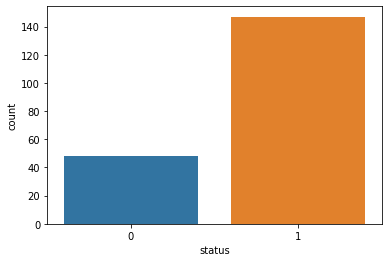

In [14]:
# Visualize the count
sns.countplot(df['status'])

In [16]:
# Get the data types
df.dtypes
# The object will the bases of the identifier for the model

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [26]:
# Create the feature data set
X = df.drop(['name'], 1)
X = np.array(X.drop(['status'], 1))
# Create the target data set
Y = np.array(df['status'])

In [27]:
# Split the data into 80% training and 20% testing data sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [28]:
# Transform the feature data to be values between 0 and 1
sc = MinMaxScaler(feature_range=(0,1))
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
# Create a function for the models
def models(X_train, Y_train):

  # Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train, Y_train)

  # Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
  tree.fit(X_train, Y_train)

  # XGBClassifier
  # This model is based of the decision tree - speed and performance in mind
  from xgboost import XGBClassifier
  xgbc = XGBClassifier().fit(x_train, y_train)

  # Random Forrest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=0)
  forest.fit(X_train, Y_train)

  # Print the model's accuracy on the training data
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[2]XGBClassifier Training Accuracy:', xgbc.score(X_train, Y_train))
  print('[3]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))

  return log, tree, xgbc, forest

In [30]:
# Test all of the model's accuracy on the training data set
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy: 0.8333333333333334
[1]Decision Tree Classifier Training Accuracy: 1.0
[2]XGBClassifier Training Accuracy: 1.0
[3]Random Forest Classifier Training Accuracy: 0.9871794871794872


In [31]:
# Test model accuracy on test data on confusion matrix
from sklearn.metrics import confusion_matrix

for i in range( len(model) ):
  print('Model ', i)
  cm = confusion_matrix(Y_test, model[0].predict(X_test))
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  
  # Print the confusion matrix
  print(cm)
  # Print the models accuracy on the test data
  print('Parkinson Disease Prediction Model',i,'Test Accuracy:', (TP + TN)/ (TP + TN + FN + FP))
  print()

Model  0
[[ 6  2]
 [ 3 28]]
Parkinson Disease Prediction Model 0 Test Accuracy: 0.8717948717948718

Model  1
[[ 6  2]
 [ 3 28]]
Parkinson Disease Prediction Model 1 Test Accuracy: 0.8717948717948718

Model  2
[[ 6  2]
 [ 3 28]]
Parkinson Disease Prediction Model 2 Test Accuracy: 0.8717948717948718

Model  3
[[ 6  2]
 [ 3 28]]
Parkinson Disease Prediction Model 3 Test Accuracy: 0.8717948717948718



In [33]:
# Another way to get metrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print('Parkinson Disease Prediction Test Results')
for i in range( len(model) ):
  print()
  print('Model ', i)
  print( classification_report(Y_test, model[i].predict(X_test)))
  print( accuracy_score(Y_test, model[i].predict(X_test)))
  print()

Parkinson Disease Prediction Test Results

Model  0
              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.93      0.90      0.92        31

    accuracy                           0.87        39
   macro avg       0.80      0.83      0.81        39
weighted avg       0.88      0.87      0.87        39

0.8717948717948718


Model  1
              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.91      0.97      0.94        31

    accuracy                           0.90        39
   macro avg       0.87      0.80      0.83        39
weighted avg       0.89      0.90      0.89        39

0.8974358974358975


Model  2
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.97      0.98        31

    accuracy                           0.97        39
   macro avg    

In [39]:
# Print the prediction of XGBClassifier Model
pred = model[2].predict(X_test)
print('Original  : {0}'.format(", ".join(str(x) for x in Y_test)))
print('Predicted : {0}'.format(", ".join(str(x) for x in pred)))

Original  : 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0
Predicted : 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0


In [2]:
# Conclusion
print('Even though the prediction results for the XGBClassifier Model \ngave a 97.44% accuracy, this is',97.44-75.38,'% better than just simply guessing.')

Even though the prediction results for the XGBClassifier Model 
gave a 97.44% accuracy, this is 22.060000000000002 % better than just simply guessing.
